In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


In [49]:
# Load the csv file
train = pd.read_csv('train.csv')
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribe
0,22570,46,blue-collar,married,primary,no,4944,yes,no,cellular,14,may,108,1,356,2,failure,no
1,38062,34,management,single,tertiary,no,2115,no,no,cellular,16,nov,205,1,93,3,other,yes
2,19593,31,blue-collar,single,secondary,no,1151,yes,no,cellular,29,apr,341,1,-1,0,NaN,yes
3,36247,33,self-employed,single,tertiary,no,2730,yes,no,telephone,6,jun,826,2,-1,0,NaN,no
4,32127,44,management,married,tertiary,yes,-171,no,no,cellular,22,aug,402,2,-1,0,NaN,no


In [50]:
# try each wotd to a number tht symbolises it in 'job'

job_mapping = {
    "admin.": "1",
    "blue-collar": "3",
    "technician": "4",
    "services": "5",
    "management": "6",
    "retired": "7",
    "entrepreneur": "8",
    "self-employed": "9",
    "housemaid": "10",
    "unemployed": "11",
    "student": "12",
}

train['job'] = train['job'].map(job_mapping)
#dictate missing values for 'job' with '2'
train['job'].fillna(2, inplace=True)
train['job'] = train['job'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['job'].value_counts())
print(train['job'].isnull().sum())

C:\Users\Rouge\AppData\Local\Temp\ipykernel_17884\270073646.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['job'].fillna(2, inplace=True)


job
3     10145
6      6165
4      5899
5      2397
11     1951
1      1922
7      1581
9      1457
8       873
12      844
10      699
2        67
Name: count, dtype: int64
0


In [51]:
# try each wotd to a number tht symbolises it in 'marital'

marital_mapping = {
    "married": "1",
    "single": "2",
    "divorced": "3",
}

train['marital'] = train['marital'].map(marital_mapping)
train['marital'] = train['marital'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['marital'].value_counts())
print(train['marital'].isnull().sum())

marital
1    19419
2    11124
3     3457
Name: count, dtype: int64
0


In [52]:
# try each wotd to a number tht symbolises it in 'education'

education_mapping = {
    "secondary": "1",
    "tertiary": "2",
    "primary": "3",
}

train['education'] = train['education'].map(education_mapping)
# prompt: dictate missing values for 'education' with '0'
train['education'].fillna(0, inplace=True)
train['education'] = train['education'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['education'].value_counts())
# missing values left
print(train['education'].isnull().sum())

C:\Users\Rouge\AppData\Local\Temp\ipykernel_17884\4236099155.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['education'].fillna(0, inplace=True)


education
1    14497
2    10209
3     7435
0     1859
Name: count, dtype: int64
0


In [53]:
# try each wotd to a number tht symbolises it in 'default'

default_mapping = {
    "no": "0",
    "yes": "1",
}

train['default'] = train['default'].map(default_mapping)
train['default'] = train['default'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['default'].value_counts())
print(train['default'].isnull().sum())

default
0    31405
1     2595
Name: count, dtype: int64
0


In [54]:
# try each wotd to a number tht symbolises it in 'housing'

housing_mapping = {
    "no": "0",
    "yes": "1",
}

train['housing'] = train['housing'].map(housing_mapping)
train['housing'] = train['housing'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['housing'].value_counts())
print(train['housing'].isnull().sum())

housing
1    17724
0    16276
Name: count, dtype: int64
0


In [55]:
# try each wotd to a number tht symbolises it in 'loan'

loan_mapping = {
    "no": "0",
    "yes": "1",
}

train['loan'] = train['loan'].map(loan_mapping)
train['loan'] = train['loan'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['loan'].value_counts())
print(train['loan'].isnull().sum())

loan
0    29727
1     4273
Name: count, dtype: int64
0


In [56]:
# Verify
print(train['contact'].value_counts())

contact
cellular     21726
telephone     3545
Name: count, dtype: int64


In [57]:
# prompt: try each wotd to a number tht symbolises it in 'contact'

contact_mapping = {
    "cellular": "1",
    "telephone": "2",
}

train['contact'] = train['contact'].map(contact_mapping)
# dictate missing values for 'contact' with '0'
train['contact'].fillna(0, inplace=True)
train['contact'] = train['contact'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['contact'].value_counts())
print(train['contact'].isnull().sum())

contact
1    21726
0     8729
2     3545
Name: count, dtype: int64
0


C:\Users\Rouge\AppData\Local\Temp\ipykernel_17884\46961366.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['contact'].fillna(0, inplace=True)


In [58]:
# try each wotd to a number tht symbolises it in 'month'
month_mapping = {
    "jan": "1",
    "feb": "2",
    "mar": "3",
    "apr": "4",
    "may": "5",
    "jun": "6",
    "jul": "7",
    "aug": "8",
    "sep": "9",
    "oct": "10",
    "nov": "11",
    "dec": "12",
}

train['month'] = train['month'].map(month_mapping)
train['month'] = train['month'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['month'].value_counts())
print(train['month'].isnull().sum())

month
5     11634
7      5497
8      3843
11     3111
6      2879
2      2028
4      1291
12     1037
1       968
9       766
10      579
3       367
Name: count, dtype: int64
0


In [59]:
# try each wotd to a number tht symbolises it in 'poutcome'

poutcome_mapping = {
    "failure": "1",
    "success": "2",
    "other": "3",
}

train['poutcome'] = train['poutcome'].map(poutcome_mapping)
# dictate missing values for 'poutcome' with '0'
train['poutcome'].fillna(0, inplace=True)
train['poutcome'] = train['poutcome'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['poutcome'].value_counts())
print(train['poutcome'].isnull().sum())

poutcome
0    25471
1     3703
2     2513
3     2313
Name: count, dtype: int64
0


C:\Users\Rouge\AppData\Local\Temp\ipykernel_17884\409046658.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['poutcome'].fillna(0, inplace=True)


In [60]:
# try each wotd to a number tht symbolises it in 'subscribe'

subscribe_mapping = {
    "no": "0",
    "yes": "1",
}

train['subscribe'] = train['subscribe'].map(subscribe_mapping)
train['subscribe'] = train['subscribe'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['subscribe'].value_counts())
print(train['subscribe'].isnull().sum())

subscribe
0    26149
1     7851
Name: count, dtype: int64
0


In [61]:
# Define the path for the CSV file in Google Drive
path = "trinV1.csv"

# Save the filtered data as a CSV file
train.to_csv(path)

print("Data has been saved :", path)

Data has been saved : trinV1.csv


In [62]:
# Load the csv file
train = pd.read_csv('test.csv')
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,25453,41,self-employed,married,tertiary,no,203,no,no,NaN,29,jan,54,1,-1,0,NaN
1,16750,29,technician,single,secondary,no,-114,yes,yes,NaN,14,may,182,2,-1,0,NaN
2,6235,44,services,married,secondary,no,548,no,no,cellular,14,jul,406,2,-1,0,NaN
3,20804,33,unemployed,single,tertiary,no,2101,yes,no,cellular,14,feb,203,2,180,1,failure
4,6673,57,housemaid,married,secondary,no,2559,no,yes,telephone,8,jul,112,1,-1,0,NaN


In [63]:
# try each wotd to a number tht symbolises it in 'job'

job_mapping = {
    "admin.": "1",
    "blue-collar": "3",
    "technician": "4",
    "services": "5",
    "management": "6",
    "retired": "7",
    "entrepreneur": "8",
    "self-employed": "9",
    "housemaid": "10",
    "unemployed": "11",
    "student": "12",
}

train['job'] = train['job'].map(job_mapping)
#dictate missing values for 'job' with '2'
train['job'].fillna(2, inplace=True)
train['job'] = train['job'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['job'].value_counts())
print(train['job'].isnull().sum())

job
3     2477
6     1535
4     1450
5      622
11     486
1      483
7      395
9      375
12     240
8      230
10     194
2       13
Name: count, dtype: int64
0


C:\Users\Rouge\AppData\Local\Temp\ipykernel_17884\270073646.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['job'].fillna(2, inplace=True)


In [64]:
# try each wotd to a number tht symbolises it in 'marital'

marital_mapping = {
    "married": "1",
    "single": "2",
    "divorced": "3",
}

train['marital'] = train['marital'].map(marital_mapping)
train['marital'] = train['marital'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['marital'].value_counts())
print(train['marital'].isnull().sum())

marital
1    4819
2    2802
3     879
Name: count, dtype: int64
0


In [65]:
# try each wotd to a number tht symbolises it in 'education'

education_mapping = {
    "secondary": "1",
    "tertiary": "2",
    "primary": "3",
}

train['education'] = train['education'].map(education_mapping)
# dictate missing values for 'education' with '0'
train['education'].fillna(0, inplace=True)
train['education'] = train['education'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['education'].value_counts())
# missing values left
print(train['education'].isnull().sum())

education
1    3581
2    2571
3    1847
0     501
Name: count, dtype: int64
0


C:\Users\Rouge\AppData\Local\Temp\ipykernel_17884\4236099155.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['education'].fillna(0, inplace=True)


In [66]:
# try each wotd to a number tht symbolises it in 'default'

default_mapping = {
    "no": "0",
    "yes": "1",
}

train['default'] = train['default'].map(default_mapping)
train['default'] = train['default'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['default'].value_counts())
print(train['default'].isnull().sum())

default
0    7805
1     695
Name: count, dtype: int64
0


In [67]:
# try each wotd to a number tht symbolises it in 'housing'

housing_mapping = {
    "no": "0",
    "yes": "1",
}

train['housing'] = train['housing'].map(housing_mapping)
train['housing'] = train['housing'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['housing'].value_counts())
print(train['housing'].isnull().sum())

housing
1    4486
0    4014
Name: count, dtype: int64
0


In [68]:
# try each wotd to a number tht symbolises it in 'loan'

loan_mapping = {
    "no": "0",
    "yes": "1",
}

train['loan'] = train['loan'].map(loan_mapping)
train['loan'] = train['loan'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['loan'].value_counts())
print(train['loan'].isnull().sum())

loan
0    7432
1    1068
Name: count, dtype: int64
0


In [69]:
# try each wotd to a number tht symbolises it in 'contact'

contact_mapping = {
    "cellular": "1",
    "telephone": "2",
}

train['contact'] = train['contact'].map(contact_mapping)
# dictate missing values for 'contact' with '0'
train['contact'].fillna(0, inplace=True)
train['contact'] = train['contact'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['contact'].value_counts())
print(train['contact'].isnull().sum())

contact
1    5494
0    2142
2     864
Name: count, dtype: int64
0


C:\Users\Rouge\AppData\Local\Temp\ipykernel_17884\46961366.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['contact'].fillna(0, inplace=True)


In [70]:
# try each wotd to a number tht symbolises it in 'month'
month_mapping = {
    "jan": "1",
    "feb": "2",
    "mar": "3",
    "apr": "4",
    "may": "5",
    "jun": "6",
    "jul": "7",
    "aug": "8",
    "sep": "9",
    "oct": "10",
    "nov": "11",
    "dec": "12",
}

train['month'] = train['month'].map(month_mapping)
train['month'] = train['month'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['month'].value_counts())
print(train['month'].isnull().sum())

month
5     2872
7     1398
8      957
11     857
6      648
2      506
4      332
12     264
1      241
9      201
10     147
3       77
Name: count, dtype: int64
0


In [71]:
# try each wotd to a number tht symbolises it in 'poutcome'

poutcome_mapping = {
    "failure": "1",
    "success": "2",
    "other": "3",
}

train['poutcome'] = train['poutcome'].map(poutcome_mapping)
# prompt: dictate missing values for 'poutcome' with '0'
train['poutcome'].fillna(0, inplace=True)
train['poutcome'] = train['poutcome'].apply(pd.to_numeric, errors='coerce')
# Verify
print(train['poutcome'].value_counts())
print(train['poutcome'].isnull().sum())

poutcome
0    6337
1     932
2     640
3     591
Name: count, dtype: int64
0


C:\Users\Rouge\AppData\Local\Temp\ipykernel_17884\409046658.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['poutcome'].fillna(0, inplace=True)


In [72]:
# Define the path for the CSV file in Google Drive
path = "testV1.csv"

# Save the filtered data as a CSV file
train.to_csv(path)

print("Data has been saved to :", path)

Data has been saved to : testV1.csv


In [73]:
# Load the csv file
train = pd.read_csv('trinV1.csv')
train.head()

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribe
0,0,22570,46,3,1,3,0,4944,1,0,1,14,5,108,1,356,2,1,0
1,1,38062,34,6,2,2,0,2115,0,0,1,16,11,205,1,93,3,3,1
2,2,19593,31,3,2,1,0,1151,1,0,1,29,4,341,1,-1,0,0,1
3,3,36247,33,9,2,2,0,2730,1,0,2,6,6,826,2,-1,0,0,0
4,4,32127,44,6,1,2,1,-171,0,0,1,22,8,402,2,-1,0,0,0


In [74]:
# Load the csv file
test = pd.read_csv('testV1.csv')
test.head()

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,0,25453,41,9,1,2,0,203,0,0,0,29,1,54,1,-1,0,0
1,1,16750,29,4,2,1,0,-114,1,1,0,14,5,182,2,-1,0,0
2,2,6235,44,5,1,1,0,548,0,0,1,14,7,406,2,-1,0,0
3,3,20804,33,11,2,2,0,2101,1,0,1,14,2,203,2,180,1,1
4,4,6673,57,10,1,1,0,2559,0,1,2,8,7,112,1,-1,0,0


In [75]:
from sklearn.pipeline import Pipeline

C:\Users\Rouge\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5266
           1       0.70      0.50      0.58      1534

    accuracy                           0.84      6800
   macro avg       0.78      0.72      0.74      6800
weighted avg       0.83      0.84      0.83      6800

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5266
           1       0.71      0.55      0.62      1534

    accuracy                           0.85      6800
   macro avg       0.79      0.74      0.76      6800
weighted avg       0.84      0.85      0.84      6800



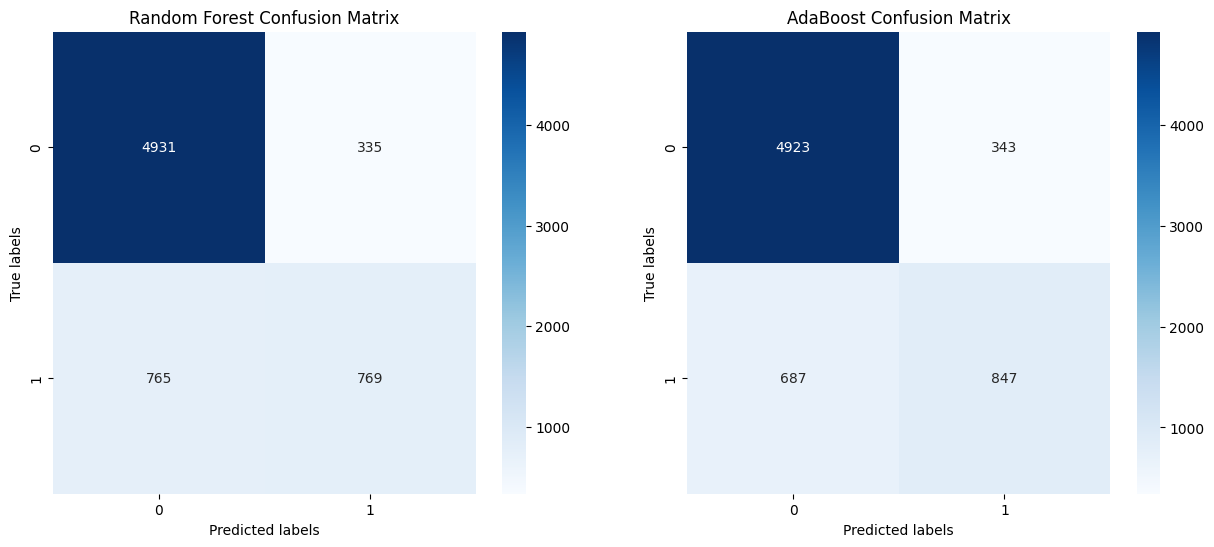

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target variable (y)
X = train.drop('subscribe', axis=1)  # Features
y = train['subscribe']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define parameter grid for Random Forest
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2']
}

# Define a pipeline for AdaBoost
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(random_state=42))
])

# Define parameter grid for AdaBoost
ada_param_grid = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.1, 0.5, 1.0]
}

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, scoring='f1', cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for AdaBoost
ada_grid_search = GridSearchCV(ada_pipeline, ada_param_grid, scoring='f1', cv=5, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

# Evaluate on test set
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_grid_search.predict(X_test)))
print("AdaBoost Classification Report:")
print(classification_report(y_test, ada_grid_search.predict(X_test)))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_grid_search.predict(X_test))
conf_matrix_ada = confusion_matrix(y_test, ada_grid_search.predict(X_test))

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_ada, annot=True, fmt="d", cmap="Blues")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.show()

In [77]:
# Assuming 'test' DataFrame contains the preprocessed test data

# Make predictions using the Random Forest model
rf_predictions = rf_grid_search.predict(test)

# Make predictions using the AdaBoost model
ada_predictions = ada_grid_search.predict(test)

# Add the predictions to the test DataFrame
test['rf_prediction'] = rf_predictions
test['ada_prediction'] = ada_predictions

# Print predictions
print("Random Forest Predictions:")
print(test[['id', 'rf_prediction']])

print("\nAdaBoost Predictions:")
print(test[['id', 'ada_prediction']])

Random Forest Predictions:
         id  rf_prediction
0     25453              0
1     16750              0
2      6235              0
3     20804              0
4      6673              0
...     ...            ...
8495  15457              0
8496   1007              0
8497  11454              1
8498  42315              0
8499  34750              0

[8500 rows x 2 columns]

AdaBoost Predictions:
         id  ada_prediction
0     25453               1
1     16750               1
2      6235               1
3     20804               0
4      6673               0
...     ...             ...
8495  15457               0
8496   1007               0
8497  11454               0
8498  42315               0
8499  34750               0

[8500 rows x 2 columns]


In [91]:
# Define the path for the CSV file in Google Drive
path = "final_results.csv"

# Save the filtered data as a CSV file
test.to_csv(path)

print("Data has been saved to :", path)

Data has been saved to : final_results.csv


In [1]:
# Load the csv file
final_results= pd.read_csv('final_results.csv')
final_results.head()

NameError: name 'pd' is not defined

In [97]:
test.head()

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,rf_prediction,ada_prediction
0,0,25453,41,9,1,2,0,203,0,0,0,29,1,54,1,-1,0,0,0,1
1,1,16750,29,4,2,1,0,-114,1,1,0,14,5,182,2,-1,0,0,0,1
2,2,6235,44,5,1,1,0,548,0,0,1,14,7,406,2,-1,0,0,0,1
3,3,20804,33,11,2,2,0,2101,1,0,1,14,2,203,2,180,1,1,0,0
4,4,6673,57,10,1,1,0,2559,0,1,2,8,7,112,1,-1,0,0,0,0


In [3]:
# Load the csv file
train = pd.read_csv('trinV1.csv')
train.head()

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribe
0,0,22570,46,3,1,3,0,4944,1,0,1,14,5,108,1,356,2,1,0
1,1,38062,34,6,2,2,0,2115,0,0,1,16,11,205,1,93,3,3,1
2,2,19593,31,3,2,1,0,1151,1,0,1,29,4,341,1,-1,0,0,1
3,3,36247,33,9,2,2,0,2730,1,0,2,6,6,826,2,-1,0,0,0
4,4,32127,44,6,1,2,1,-171,0,0,1,22,8,402,2,-1,0,0,0


In [7]:
train

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribe
0,0,22570,46,3,1,3,0,4944,1,0,1,14,5,108,1,356,2,1,0
1,1,38062,34,6,2,2,0,2115,0,0,1,16,11,205,1,93,3,3,1
2,2,19593,31,3,2,1,0,1151,1,0,1,29,4,341,1,-1,0,0,1
3,3,36247,33,9,2,2,0,2730,1,0,2,6,6,826,2,-1,0,0,0
4,4,32127,44,6,1,2,1,-171,0,0,1,22,8,402,2,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33995,33995,20257,62,7,1,2,0,164,0,0,1,5,10,373,1,169,7,3,1
33996,33996,29152,28,3,2,1,1,571,0,0,0,2,6,63,1,-1,0,0,0
33997,33997,19814,28,4,1,1,0,28,1,1,2,12,1,177,3,265,1,3,0
33998,33998,25303,47,4,1,1,0,2154,1,0,1,19,11,140,1,356,2,1,0


In [6]:
# Load the csv file
final_results = pd.read_csv('final_results.csv')
final_results.head()

,Unnamed: 0.1,Unnamed: 0,id,age,job,marital,education,default,balance,housing,...,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,rf_prediction,ada_prediction
0,0,0,25453,41,9,1,2,0,203,0,...,0,29,1,54,1,-1,0,0,0,1
1,1,1,16750,29,4,2,1,0,-114,1,...,0,14,5,182,2,-1,0,0,0,1
2,2,2,6235,44,5,1,1,0,548,0,...,1,14,7,406,2,-1,0,0,0,1
3,3,3,20804,33,11,2,2,0,2101,1,...,1,14,2,203,2,180,1,1,0,0
4,4,4,6673,57,10,1,1,0,2559,0,...,2,8,7,112,1,-1,0,0,0,0


In [32]:
# Calculate counts for train data and final results
train_counts = train['subscribe'].value_counts()
final_counts = final_results['ada_prediction'].value_counts()

# Calculate percentages
train_percentages = train_counts / len(train) * 100
final_percentages = final_counts / len(final_results) * 100

# Display counts and percentages
print("Train Data Counts:")
print(train_counts)
print("\nFinal Results Counts:")
print(final_counts)

print("\nTrain Data Percentages:")
print(train_percentages)
print("\nFinal Results Percentages:")
print(final_percentages)


Train Data Counts:
subscribe
0    26149
1     7851
Name: count, dtype: int64

Final Results Counts:
ada_prediction
0    7082
1    1418
Name: count, dtype: int64

Train Data Percentages:
subscribe
0    76.908824
1    23.091176
Name: count, dtype: float64

Final Results Percentages:
ada_prediction
0    83.317647
1    16.682353
Name: count, dtype: float64


In [12]:
# Load the csv file
final_results= pd.read_csv('final_results.csv')
final_results.head()

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,ada_prediction
0,0,25453,41,9,1,2,0,203,0,0,0,29,1,54,1,-1,0,0,1
1,1,16750,29,4,2,1,0,-114,1,1,0,14,5,182,2,-1,0,0,1
2,2,6235,44,5,1,1,0,548,0,0,1,14,7,406,2,-1,0,0,1
3,3,20804,33,11,2,2,0,2101,1,0,1,14,2,203,2,180,1,1,0
4,4,6673,57,10,1,1,0,2559,0,1,2,8,7,112,1,-1,0,0,0


In [13]:
final_results.drop(columns=['Unnamed: 0'], inplace=True)

final_results.drop(columns=['age'], inplace=True)
final_results.drop(columns=['marital'], inplace=True)
final_results.drop(columns=['education'], inplace=True)
final_results.drop(columns=['default'], inplace=True)
final_results.drop(columns=['balance'], inplace=True)
final_results.drop(columns=['housing'], inplace=True)
final_results.drop(columns=['loan'], inplace=True)


final_results.drop(columns=['contact'], inplace=True)
final_results.drop(columns=['day_of_week'], inplace=True)
final_results.drop(columns=['month'], inplace=True)
final_results.drop(columns=['duration'], inplace=True)

final_results.drop(columns=['campaign'], inplace=True)
final_results.drop(columns=['pdays'], inplace=True)
final_results.drop(columns=['previous'], inplace=True)
final_results.drop(columns=['poutcome'], inplace=True)


In [15]:
final_results.drop(columns=['job'], inplace=True)

In [16]:
final_results.head()

,id,ada_prediction
0,25453,1
1,16750,1
2,6235,1
3,20804,0
4,6673,0


In [21]:
# Define the path for the CSV file in Google Drive
path = "final_results.csv"

# Save the filtered data as a CSV file
final_results.to_csv(path)

print("Data has been saved to :", path)

Data has been saved to : final_results.csv


In [22]:
# Load the csv file
final_results= pd.read_csv('final_results.csv')
final_results.head()

,Unnamed: 0,id,ada_prediction
0,0,25453,1
1,1,16750,1
2,2,6235,1
3,3,20804,0
4,4,6673,0


In [23]:
final_results.drop(columns=['Unnamed: 0'], inplace=True)

In [24]:
final_results

,id,ada_prediction
0,25453,1
1,16750,1
2,6235,1
3,20804,0
4,6673,0
...,...,...
8495,15457,0
8496,1007,0
8497,11454,0
8498,42315,0


In [25]:
# Define the path for the CSV file in Google Drive
path = "final_results.csv"

# Save the filtered data as a CSV file
final_results.to_csv(path)

print("Data has been saved to :", path)

Data has been saved to : final_results.csv


In [27]:
# Load the csv file
final_results= pd.read_csv('final_results.csv')
final_results.head()

,Unnamed: 0,id,ada_prediction
0,0,25453,1
1,1,16750,1
2,2,6235,1
3,3,20804,0
4,4,6673,0


In [29]:
final_results.head()

,Unnamed: 0,id,ada_prediction
0,0,25453,1
1,1,16750,1
2,2,6235,1
3,3,20804,0
4,4,6673,0
